In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Egg-production-dataset-state-wise-india/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Egg-production-dataset-state-wise-india/eggs.csv


In [9]:
df_eggs = pd.read_csv('DataSets/Egg-production-dataset-state-wise-india/eggs.csv')
df_eggs.head(5)

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,Andaman and Nicobar Islands,530,477,535,622,618,657,672,780,741,1193,861,989,1032,1074,1139,1189
1,Andhra Pradesh#,158040,164534,159411,175884,183446,193958,201277,212103,222974,227875,130958,141743,158274,177776,197545,219275
2,Arunachal Pradesh,90,73,73,394,361,380,407,53,439,400,417,427,495,550,595,605
3,Assam,5216,5359,5350,4910,4659,4671,4707,4705,4710,4717,4728,4740,4771,4952,5015,5149
4,Bihar,7894,10012,9454,10707,10740,11002,7446,7552,8372,9308,9845,10021,11117,12185,17633,27408


In [10]:
## check for NaN , empty values for each columns
df_eggs['2004-05'].describe()

count      37
unique     37
top       530
freq        1
Name: 2004-05, dtype: object

In [11]:
df_eggs["2004-05"].isnull().values.any()

False

In [12]:
##loop over all columns in dataframe to check for null
for col in df_eggs:
    print(col,df_eggs[col].isnull().values.any())

State/Union Territory False
2004-05 False
2005-06 False
2006-07 False
2007-08 False
2008-09 False
2009-10 False
2010-11 False
2011-12 False
2012-13 False
2013-14 False
2014-15 False
2015-16 False
2016-17 False
2017-18 False
2018-19 False
2019-20 False


In [13]:
##loop over all columns in dataframe to check for non numeric and coerce them to 0
for col in df_eggs:
    if col != 'State/Union Territory':
        df_eggs[col] = pd.to_numeric(df_eggs[col], errors='coerce').fillna(0)

In [14]:
##check unique  values for column states
df_eggs['State/Union Territory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh#',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'ALL INDIA'], dtype=object)

C:\Users\maxim\AppData\Local\Temp\ipykernel_5628\991491433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eggs_state[cols] = StandardScaler().fit_transform(df_eggs_state[cols])


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

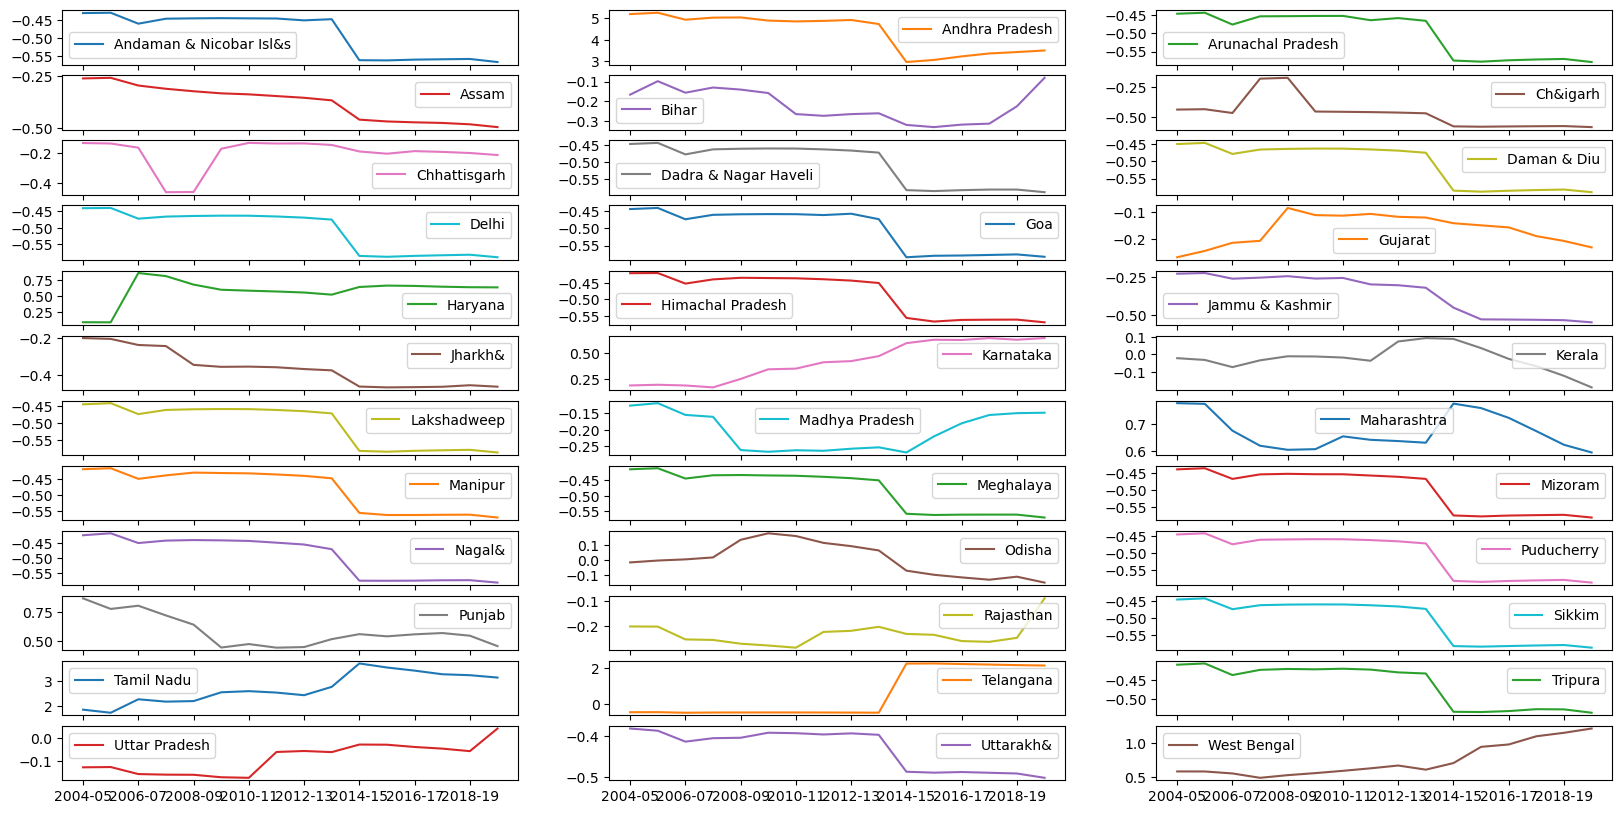

In [15]:
# plot multiple columns such as population and year from dataframe
#remove the record for All India as we are analysing state wise data
df_eggs['State/Union Territory'] = df_eggs['State/Union Territory'].apply(lambda x: x.replace('#',""))
df_eggs['State/Union Territory'] = df_eggs['State/Union Territory'].apply(lambda x: x.replace('and',"&"))

df_eggs_state = df_eggs[df_eggs["State/Union Territory"]!="ALL INDIA"]
cols = ['2004-05', '2005-06', '2006-07', '2007-08',
        '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
        '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

df_eggs_state[cols] = StandardScaler().fit_transform(df_eggs_state[cols])
df_eggs_state.set_index("State/Union Territory",inplace=True)
#transpose dataframe so that state becomes column wise data
df_eggs_state = df_eggs_state.T
df_eggs_state.head(5)

#display plot
df_eggs_state=df_eggs_state.astype(float)
df_eggs_state.plot(subplots=True, figsize=(20, 10), layout=(12, 3))

**Interesting trend analysis** States which have seen a steep decline in production over the years Assam Jharkand Lakshadep Manipur Nagaland

States which have seen an increase in production over the years Karnatka West Bengal

State for which initial data is missing and then maintened steady production Telangana

### Geo spatial analysis for last year 2019-20**

In [19]:
df_eggs_last_year = df_eggs[df_eggs["State/Union Territory"]!="ALL INDIA"]
df_eggs_last_year = df_eggs_last_year.loc[:, ["State/Union Territory",'2019-20']]
df_eggs_last_year.head(5)

,State/Union Territory,2019-20
0,Andaman & Nicobar Isl&s,1189
1,Andhra Pradesh,219275
2,Arunachal Pradesh,605
3,Assam,5149
4,Bihar,27408


### Read shape file - for GIS data

In [20]:
shp_gdf = gpd.read_file('DataSets/india-gis-data/India States/Indian_states.shp')
shp_gdf.head(30)

DriverError: DataSets/india-gis-data/India States/Indian_states.shp: No such file or directory

In [21]:
merged = shp_gdf.set_index('st_nm').join(df_eggs_last_year.set_index('State/Union Territory'),how='right')
merged.head()

NameError: name 'shp_gdf' is not defined

Merge data sets on state names

In [16]:
merged = shp_gdf.set_index('st_nm').join(df_eggs_last_year.set_index('State/Union Territory'),how='right')
merged.head()

NameError: name 'shp_gdf' is not defined

### Plot the Map with data

NameError: name 'merged' is not defined

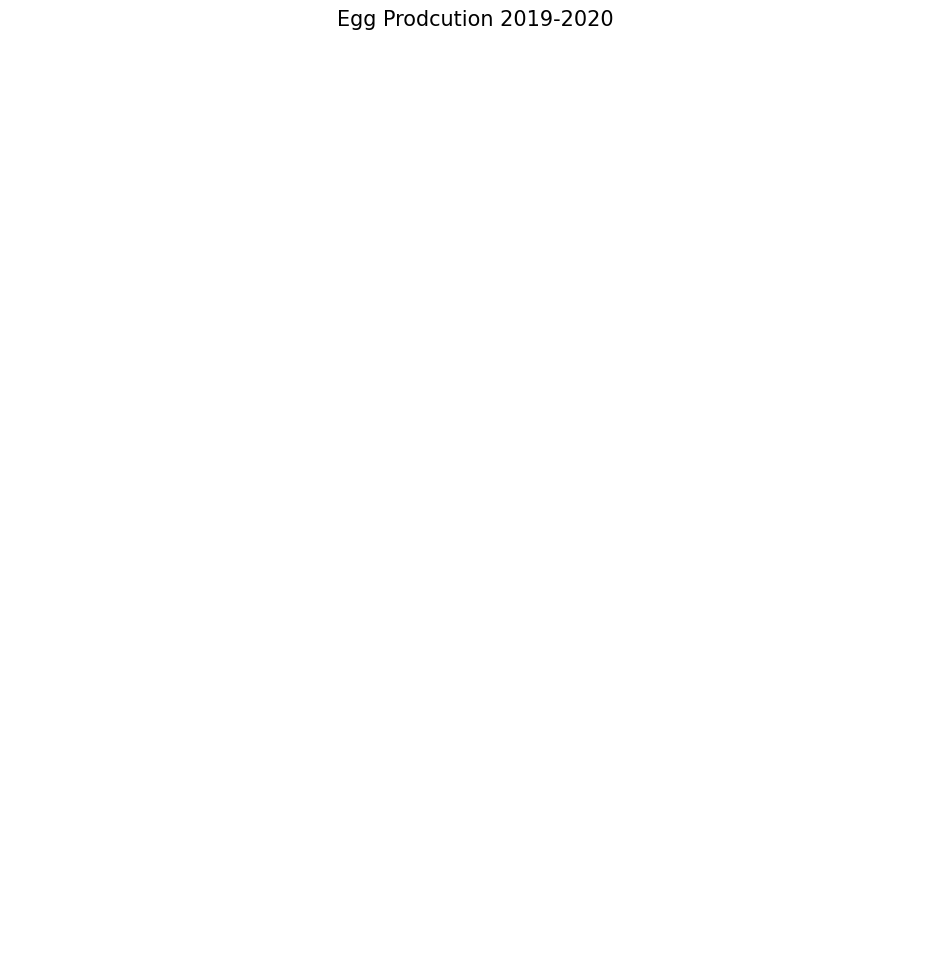

In [17]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Egg Prodcution 2019-2020',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='2019-20', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)